In [1]:
pip install muselsl

Note: you may need to restart the kernel to use updated packages.


In [1]:
from muselsl import stream, list_muses, record
import numpy as np
import pandas as pd
import mne

In [2]:
muses = list_muses()

Starting BlueMuse, see BlueMuse window for interactive list of devices.


In [11]:
record(120)

Looking for a EEG stream...
Started acquiring data.
Looking for a Markers stream...
Can't find Markers stream.
Start recording at time t=1653138376.292
Time correction:  -1.1650000033114338e-05
Time correction:  -1.680000002579618e-05
Done - wrote file: G:\My Drive\Lab\jupyter_notebooks\Neural Interfaces\Muse\EEG_recording_2022-05-21-13.06.10.csv


In [4]:
data1 = pd.read_csv(r'G:\My Drive\Lab\jupyter_notebooks\Neural Interfaces\Muse\EEG_recording_2022-05-18-23.55.52.csv')
data2 = pd.read_csv(r'G:\My Drive\Lab\jupyter_notebooks\Neural Interfaces\Muse\EEG_recording_2022-05-19-00.21.26.csv')
data3 = pd.read_csv(r'G:\My Drive\Lab\jupyter_notebooks\Neural Interfaces\Muse\EEG_recording_2022-05-19-00.22.34.csv')
data4 = pd.read_csv(r'G:\My Drive\Lab\jupyter_notebooks\Neural Interfaces\Muse\EEG_recording_2022-05-19-00.26.23.csv')
data5 = pd.read_csv(r'G:\My Drive\Lab\jupyter_notebooks\Neural Interfaces\Muse\EEG_recording_2022-05-21-13.02.47.csv')

In [12]:
def muse_psd(data_path):
    data = pd.read_csv(r'{}'.format(data_path))
    ch_names = list(data.columns[1:5])
    sfreq = 256
    ch_types = ['eeg'] * 4
    eeg_data = data.iloc[:,1:5].to_numpy().T
    mne_info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
    raw = mne.io.RawArray(eeg_data, info=mne_info)
    raw.plot_psd()

Creating RawArray with float64 data, n_channels=4, n_times=29544
    Range : 0 ... 29543 =      0.000 ...   115.402 secs
Ready.
Effective window size : 8.000 (s)


C:\Users\Parsa\AppData\Local\Temp/ipykernel_11888/2013058224.py:9: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


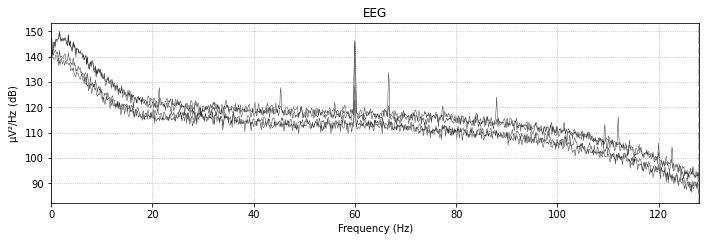

In [16]:
muse_psd(r'G:\My Drive\Lab\jupyter_notebooks\Neural Interfaces\Muse\EEG_recording_2022-05-21-13.06.10.csv')

In [25]:
data1.index.shape[0]/10

129.6

In [33]:
data2.index.shape[0]/5

2.4

In [40]:
data1.timestamps.iloc[-1]

1652918163.714

In [42]:
data1.timestamps.iloc[-1] - data1.timestamps.iloc[0]

5.052999973297119

In [43]:
data2.timestamps.iloc[-1] - data2.timestamps.iloc[0]

0.042999982833862305

In [44]:
data3.timestamps.iloc[-1] - data3.timestamps.iloc[0]

10.105999946594238

In [49]:
data4.index.shape[0]

3861

In [50]:
data4.index.shape[0]/ (data4.timestamps.iloc[-1] - data4.timestamps.iloc[0])

255.86481258853897

In [51]:
data1.index.shape[0]/ (data1.timestamps.iloc[-1] - data1.timestamps.iloc[0])

256.4812995940609

In [31]:
data3.index.shape[0]/15

172.53333333333333

In [58]:
data4

,timestamps,TP9,AF7,AF8,TP10,Right AUX
0,1.652920e+09,-24.414,139.648,-160.645,-20.020,-24.414
1,1.652920e+09,-10.254,307.129,-78.613,-14.160,-65.918
2,1.652920e+09,-14.160,392.090,-174.316,-9.277,-150.879
3,1.652920e+09,-26.367,256.348,-277.344,-22.461,-111.328
4,1.652920e+09,-41.504,-2.441,-305.176,-29.785,-134.277
...,...,...,...,...,...,...
3856,1.652920e+09,-37.598,91.309,-307.617,-46.875,-74.219
3857,1.652920e+09,-28.320,-102.539,-295.898,-60.547,99.609
3858,1.652920e+09,-39.062,453.613,-192.871,-65.430,-45.898
3859,1.652920e+09,-51.758,755.859,-174.805,-83.496,-129.395


In [66]:
data4.iloc[:,1:5].to_numpy().T

array([[ -24.414,  -10.254,  -14.16 , ...,  -39.062,  -51.758,  -45.41 ],
       [ 139.648,  307.129,  392.09 , ...,  453.613,  755.859,  275.391],
       [-160.645,  -78.613, -174.316, ..., -192.871, -174.805, -349.609],
       [ -20.02 ,  -14.16 ,   -9.277, ...,  -65.43 ,  -83.496,  -69.824]])

In [6]:
ch_names = list(data5.columns[1:5])
sfreq = 256
ch_types = ['eeg'] * 4
eeg_data = data5.iloc[:,1:5].to_numpy().T

In [7]:
ch_names

['TP9', 'AF7', 'AF8', 'TP10']

In [8]:
mne_info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

In [9]:
raw = mne.io.RawArray(eeg_data, info=mne_info)

Creating RawArray with float64 data, n_channels=4, n_times=3863
    Range : 0 ... 3862 =      0.000 ...    15.086 secs
Ready.


In [10]:
# stream(muses[0]['address'])

# # Note: Streaming is synchronous, so code here will not execute until after the stream has been closed
# print('Stream has ended')

Effective window size : 8.000 (s)


C:\Users\Parsa\AppData\Local\Temp/ipykernel_11888/2847632005.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


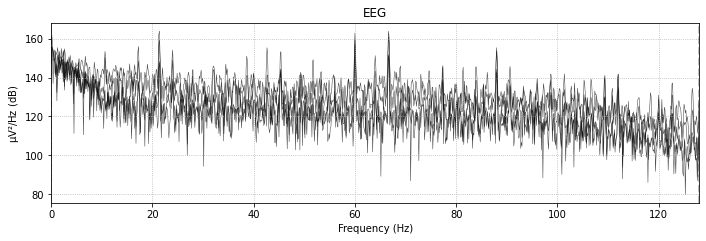

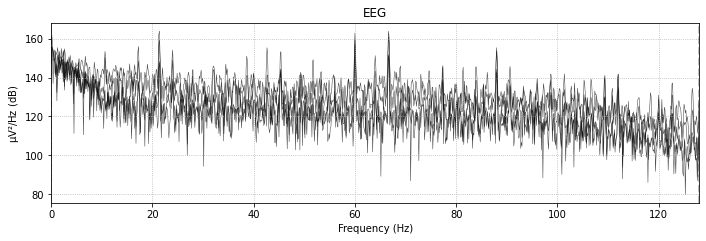

In [10]:
raw.plot_psd()